# Heart Disease Prediction on UCI Dataset

## I. Processing the Dataset

In [1]:
import pandas as pd

The dataset identifies 14 patient features or symptoms. 
- `age`: patient age
- `sex`: patient sex (0: female, 1: male)
- `cp`: chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)
- `trestbps`: resting blood pressure
- `chol`: cholesterol
- `fbs`: fasting blood sugar <120 (0: true, 1: false)
- `restecg`: resting electrocardiographic results (0: normal, 1: abnormal, 2: definite left ventricular hypertrophy)
- `thalach`: maximum heart rate achieved
- `exang`: exercise induced angina (1: yes, 0: no)
- `oldpeak`: ST depression induced by exercise relative to rest
- `slope`: the slope of the peak exercise ST segment
- `ca`: number of major vessels (0-3) colored by flourosopy
- `thal`: (3: normal, 6: fixed defect, 7: reversable defect)
- `class`: diagnosis of heart disease (0: healthy, 1-4: sick)

In [2]:
df = pd.read_csv('data.csv')
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'class']

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


This investigation does not need to classify heart dieases into types and simply predicts whether heart disease is likely or not, therefore `class` can be changed to reflect that.
- `class`: diagnosis of heart disease (0: healthy, 1: sick)

In [3]:
for i, r in enumerate(df['class']):
    if (df['class'][i]>0):
        df.at[i, 'class'] = 1
        
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


## II. Exploratory Analysis

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Covariance Matrix

<AxesSubplot:>

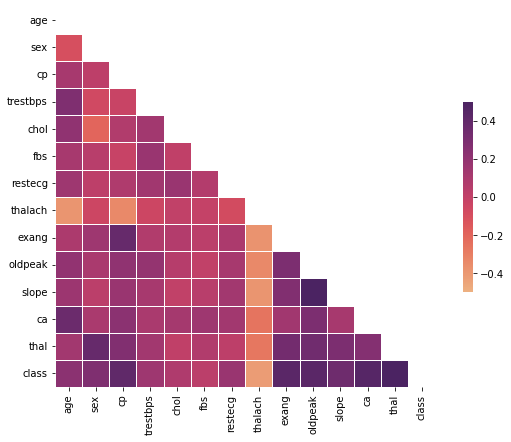

In [5]:
matrix = df.corr().round(2)

f, ax = plt.subplots(figsize=(10, 7))
mask = np.triu(np.ones_like(matrix, dtype=bool))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(matrix, mask=mask, cmap='flare', vmin=-.5, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The matrix indicates that the symptoms with the highest correlation to heart disease are chest pain, ST depression,  number of major blood vessels, and 

## III. Implementing Machine Learning Models

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

### Split the data into train and test

In [7]:
x = df.drop('class', axis=1)
y = df['class']

x.shape, y.shape

((302, 13), (302,))

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=4, shuffle=True)

In [9]:
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform(x_test)

### KNN Model

In [10]:
knn_classifier = KNeighborsClassifier(n_neighbors=22)
knn_classifier.fit(x_train_std, y_train)

KNeighborsClassifier(n_neighbors=22)

In [11]:
y_pred_knn = knn_classifier.predict(x_test_std)

In [12]:
knn_cm = confusion_matrix(y_test, y_pred_knn)
print(knn_cm)
knn_acc = accuracy_score(y_test, y_pred_knn)
print(knn_acc)

[[27  1]
 [ 7 26]]
0.8688524590163934


In [13]:
print("Accuracy on training set: {:.3f}".format(knn_classifier.score(x_train_std, y_train)))
print("Accuracy on testing set: {:.3f}".format(knn_classifier.score(x_test_std, y_test)))

Accuracy on training set: 0.830
Accuracy on testing set: 0.869


In [14]:
knn_test = knn_classifier.score(x_test_std, y_test)

In [15]:
scores = []
for k in range(1,30):
    knn = KNeighborsClassifier(k).fit(x_train_std, y_train)
    scores.append(knn.score(x_train_std, y_train))

print(scores, end = " ")

[1.0, 0.8630705394190872, 0.9087136929460581, 0.8879668049792531, 0.8796680497925311, 0.8672199170124482, 0.8630705394190872, 0.8672199170124482, 0.8672199170124482, 0.8713692946058091, 0.8589211618257261, 0.8630705394190872, 0.8547717842323651, 0.8464730290456431, 0.8423236514522822, 0.8381742738589212, 0.8423236514522822, 0.8298755186721992, 0.8381742738589212, 0.8257261410788381, 0.8340248962655602, 0.8298755186721992, 0.8298755186721992, 0.8298755186721992, 0.8340248962655602, 0.8340248962655602, 0.8423236514522822, 0.8340248962655602, 0.8381742738589212] 

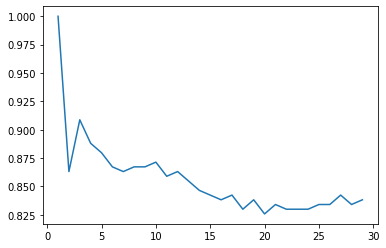

In [16]:
plt.plot(np.arange(1,30), scores)

For above dataset, the KNN algorithm uses Minkowski distance formula which is a generalised formula for Euclidean and Manhattan.
As the feature values are not uniformly distributed and have different units, so KNN with minkowski fits the best.

### Decision Tree Model

In [17]:
dt_class = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_class.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [18]:
y_pred_dt = dt_class.predict(x_test)
print(y_pred_dt)

[1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0
 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1]


In [19]:
dt_cm = confusion_matrix(y_test,y_pred_dt)
print(dt_cm)
dt_acc = accuracy_score(y_test,y_pred_dt)
print(dt_acc)

[[22  6]
 [ 7 26]]
0.7868852459016393


In [20]:
print("Accuracy on Training set: {:.3f}".format(dt_class.score(x_train,y_train)))
print("Accuracy on Test set: {:.3f}".format(dt_class.score(x_test,y_test)))
dt_test = dt_class.score(x_test,y_test)

Accuracy on Training set: 1.000
Accuracy on Test set: 0.787


In this model, the main goal is to reduce the impurity of the column values.
From above data visualisation, as we conclude that even after standardising the data, we were not able to achieve enough uniformity.
Entropy method again uses log of the proability of the values which again tries to fit the data in curve giving more accurate results.
Hence, DT gives better results on the this dataset.

In [21]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x, y)
reg.score(x, y)

0.5343538473861555

In [22]:
reg.coef_

array([-0.00104294,  0.14513679,  0.08411087,  0.00199793,  0.00036299,
       -0.06799358,  0.03512023, -0.00247276,  0.14398013,  0.03536911,
        0.06597954,  0.1351318 ,  0.06106664])

In [23]:
reg.intercept_

-0.4247648884736712